In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [3]:
#load data
df = pd.read_csv("iris.data.txt", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], header=None)
df_copy = df.copy()
y = df["class"]
df = df.drop(["class"], axis=1)
print(df.head())

             

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [9]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

K = range(1, 11)
inertias = []
#elbow method
for k in K:
    kModel = KMeans(n_clusters=k, random_state=1).fit(df_normalized)

    kModel.fit(df_normalized)

    inertias.append({k: kModel.inertia_})

In [14]:
#K means clustering
#optimal k value seems to be between 4 and 7
km = KMeans(n_clusters=3, random_state=1, init='k-means++', n_init=10)
km.fit(df_normalized)

y_km = km.predict(df_normalized)


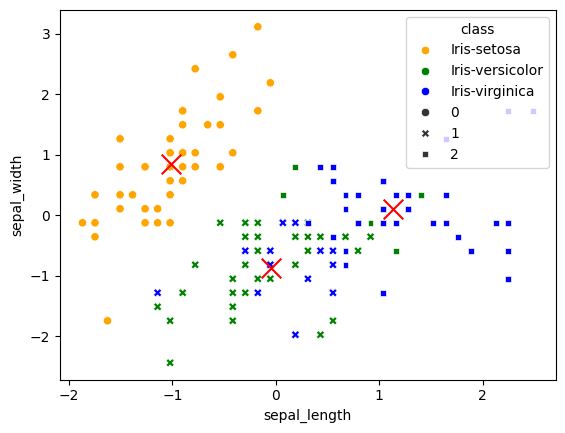

In [15]:
#K-means plotting
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.scatterplot(x="sepal_length", y="sepal_width", data=pd.DataFrame(df_normalized, columns=cols), hue=y, style=km.labels_, palette=["orange", "green", "blue"])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", s=200, c="red")

0.4589717867018717


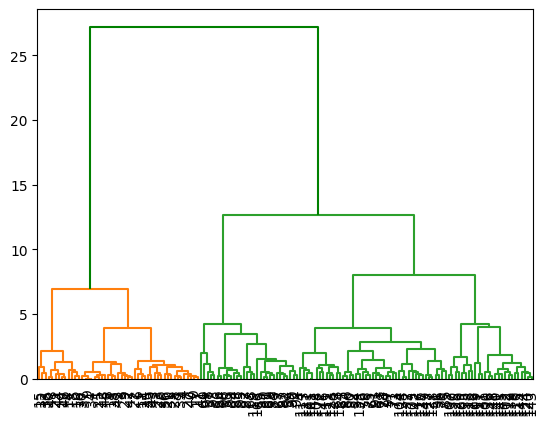

In [16]:
#Hierarchial Clustering
hc = linkage(df_normalized, method="ward", metric="euclidean")

dn = dendrogram(hc, above_threshold_color="green", leaf_font_size=10)
#silhouette score

score = silhouette_score(df_normalized, y_km)

print(score)

In [18]:
#plotting hierarchical clustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(df_normalized)
silhouette_score(df_normalized, y_agg)

0.44553956399200406

In [19]:
#cluster labels
df_clustered = df.copy()
df_clustered["Cluster"] = y_km
df_clustered["Class"] = y.values

comp_table = pd.crosstab(df_clustered["Cluster"], df_clustered["Class"])
print(comp_table)


Class    Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                 50                0               0
1                  0               39              14
2                  0               11              36


0.6201351808870379


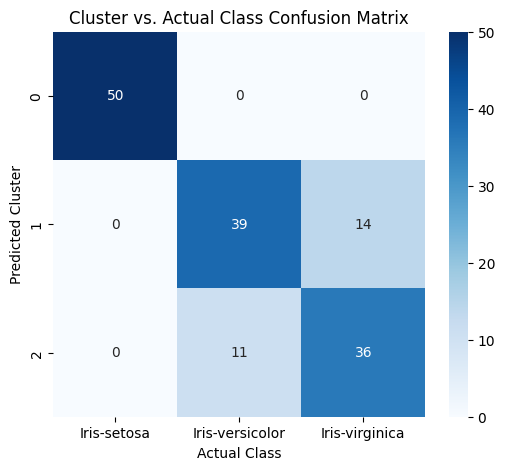

In [21]:
#evaluation
ari = adjusted_rand_score(y, y_km)
print(ari)

#confusion matrix
conf_matrix = pd.crosstab(y_km, y, rownames=["Predicted Cluster"], colnames=["Actual Class"])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Cluster vs. Actual Class Confusion Matrix")
plt.show()